## Problem Statement
Hotels face significant challenges due to last-minute cancellations and no-shows. This leads to:

- Revenue loss: Missed opportunities to fill rooms.

- Inventory mismanagement: Inability to optimize room allocation.

- Customer dissatisfaction: Overbooking or underutilization of resources.

Objective: Build a machine learning model that predicts whether a reservation will be honored or canceled, enabling hotels to make informed decisions in advance.

In [19]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Visual Settings
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.float_format", lambda x:f"{x:,.4f}")

# Global adjustment
plt.rcParams["figure.figsize"] = (11, 6)

# Graphic style
plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid")
sns.set_palette("Set1")


DATA_RAW= '../artifacts/raw/raw.csv'

# Data Preprocessing

In [20]:
# Loading and Displaying Data
df = pd.read_csv(DATA_RAW)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.6800,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.0000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.0000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5000,0,Canceled


In [3]:
# Checking the data body
df.shape

(36275, 19)

In [4]:
# Checking for Missing Values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
# Analyzing column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Observing which columns are present in the df
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
# Dropping irrelevant columns
df.drop(columns=['Booking_ID'], axis=1, inplace=True)
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.6800,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.0000,0,Canceled


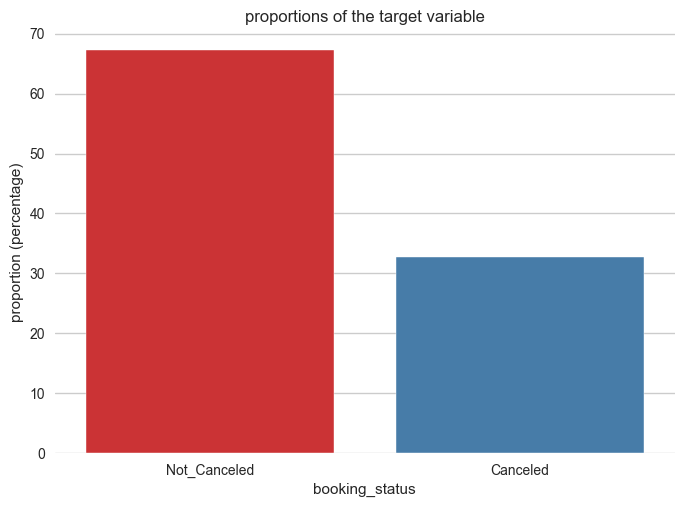

In [9]:
# Checking the target variable distribution
sns.countplot(x= df['booking_status'], hue=df.booking_status, stat='percent')
plt.title("proportions of the target variable")
plt.ylabel("proportion (percentage)")
plt.show()

In [10]:
num_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_columns = [feature for feature in df.columns if df[feature].dtype == 'O']


print(f"We have {len(num_columns)} numerical features : {num_columns}")
print()
print(f"We have {len(cat_columns)} categorical features : {cat_columns}")
print()

for col in cat_columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('------------------------------')

We have 14 numerical features : ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

We have 4 categorical features : ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

type_of_meal_plan
Meal Plan 1    76.7333
Not Selected   14.1420
Meal Plan 2     9.1110
Meal Plan 3     0.0138
Name: proportion, dtype: float64
------------------------------
room_type_reserved
Room_Type 1   77.5465
Room_Type 4   16.6975
Room_Type 6    2.6630
Room_Type 2    1.9076
Room_Type 5    0.7305
Room_Type 7    0.4356
Room_Type 3    0.0193
Name: proportion, dtype: float64
------------------------------
market_segment_type
Online          63.9945
Offline         29.0227
Corporate        5.5603
Complementary    1.0779
Aviation   

# DATA ANALYSIS

In [11]:
df_copy = df
df_copy.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.6800,1,Not_Canceled


### UNIVARIATE ANALYSIS

In [12]:
def num_plot_dist(data, numerical_features):
    # Create subplots
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, len(numerical_features)*5))
    
    # Ensure axes is always a 2D array
    axes = np.array(axes).reshape(len(numerical_features), 2)
    
    for i, column in enumerate(numerical_features):
        # Histogram
        sns.histplot(data=data, x=column, ax=axes[i][0], kde=True)
        axes[i][0].set_title(f"Histogram for {column}")
        
        # Boxplot
        sns.boxplot(data=data, x=column, ax=axes[i][1], )
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

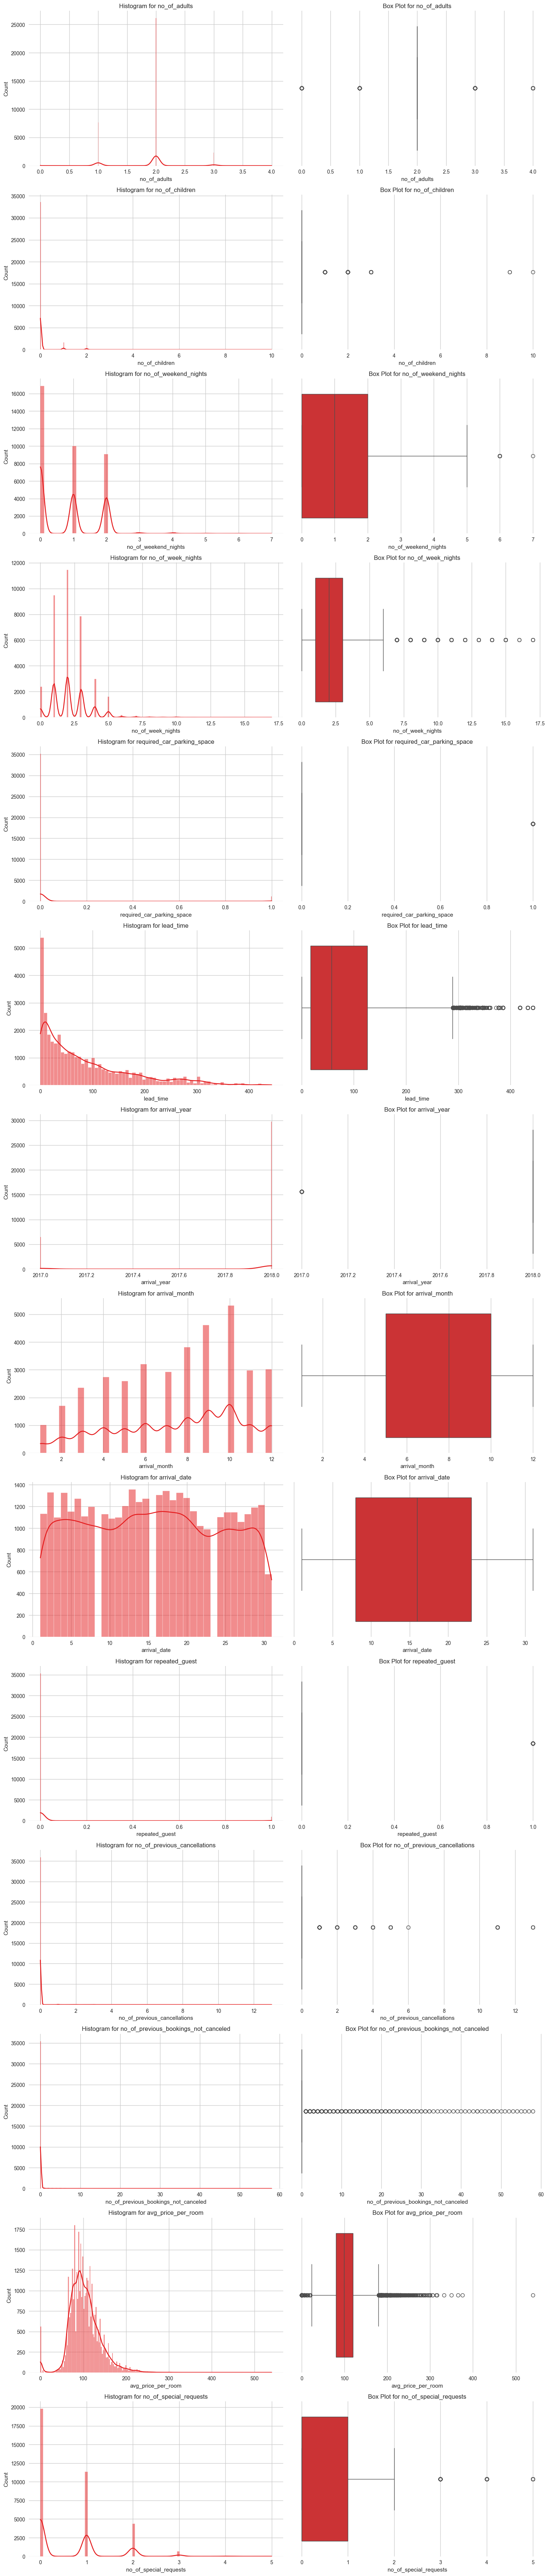

In [13]:
num_plot_dist(df_copy, num_columns)

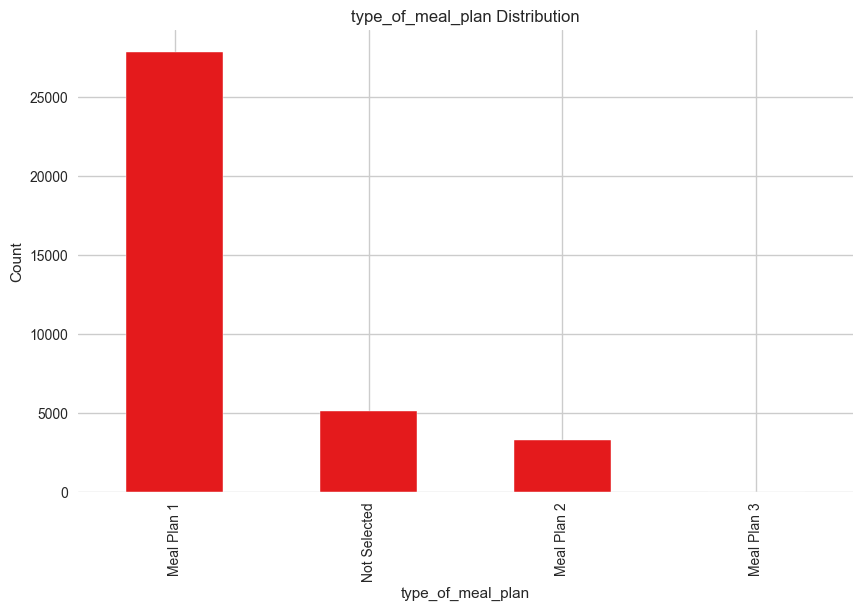

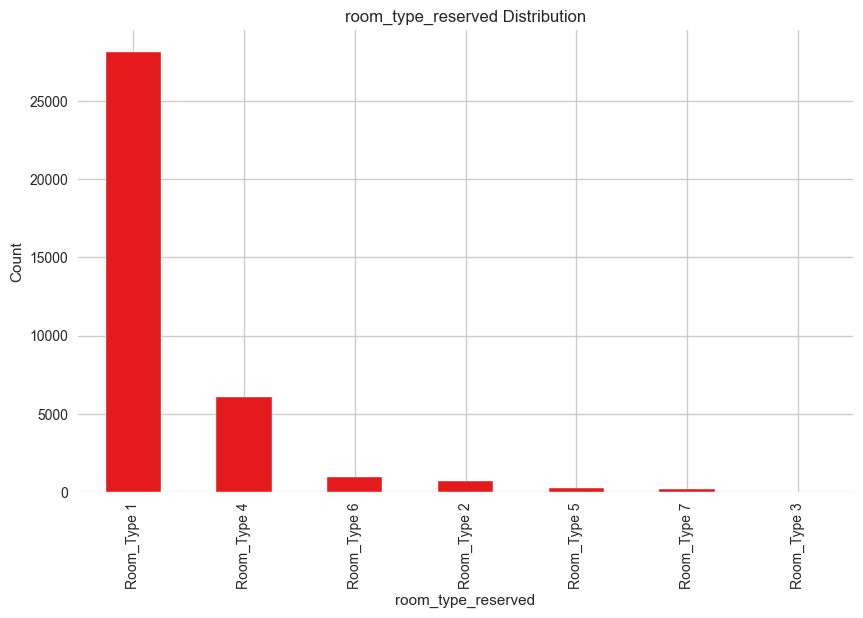

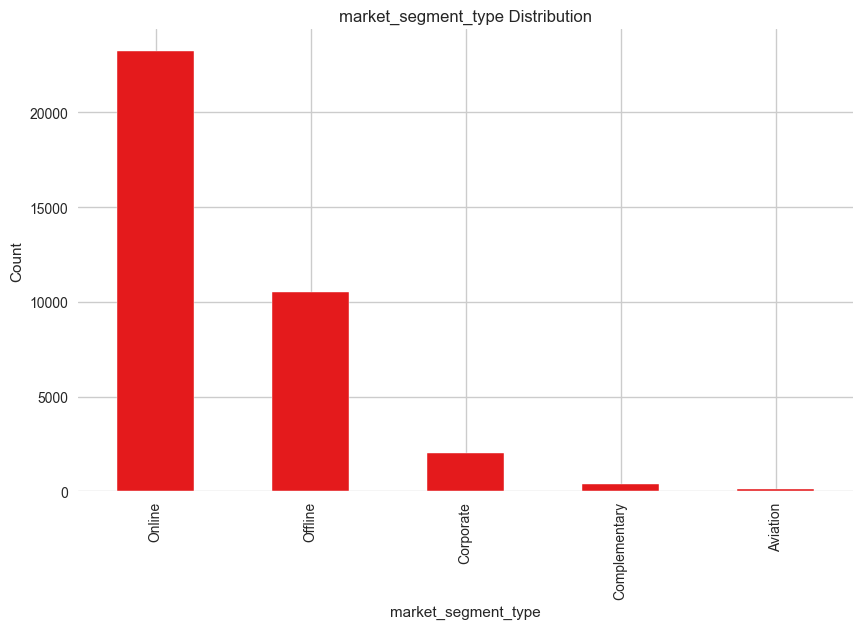

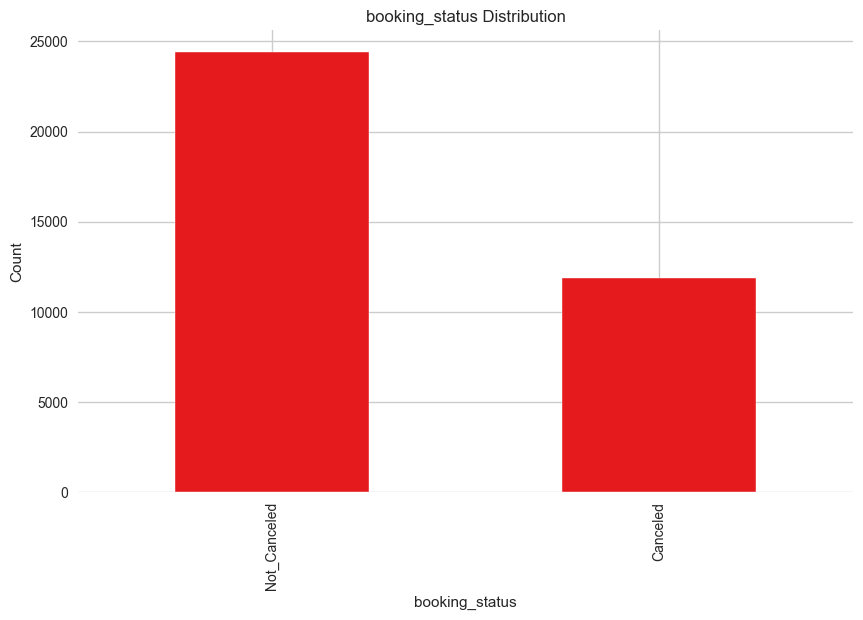

In [14]:
for cat in cat_columns:
    plt.figure(figsize = (10,6))
    df_copy[cat].value_counts().plot(kind='bar')
    plt.title(f"{cat} Distribution")
    plt.xlabel(cat)
    plt.ylabel("Count")
    plt.show()

In [15]:
def plot_bivariate_numericals(data, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows , 2 , figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x = target, y = column,ax = axes[i] , data = data , palette = "Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

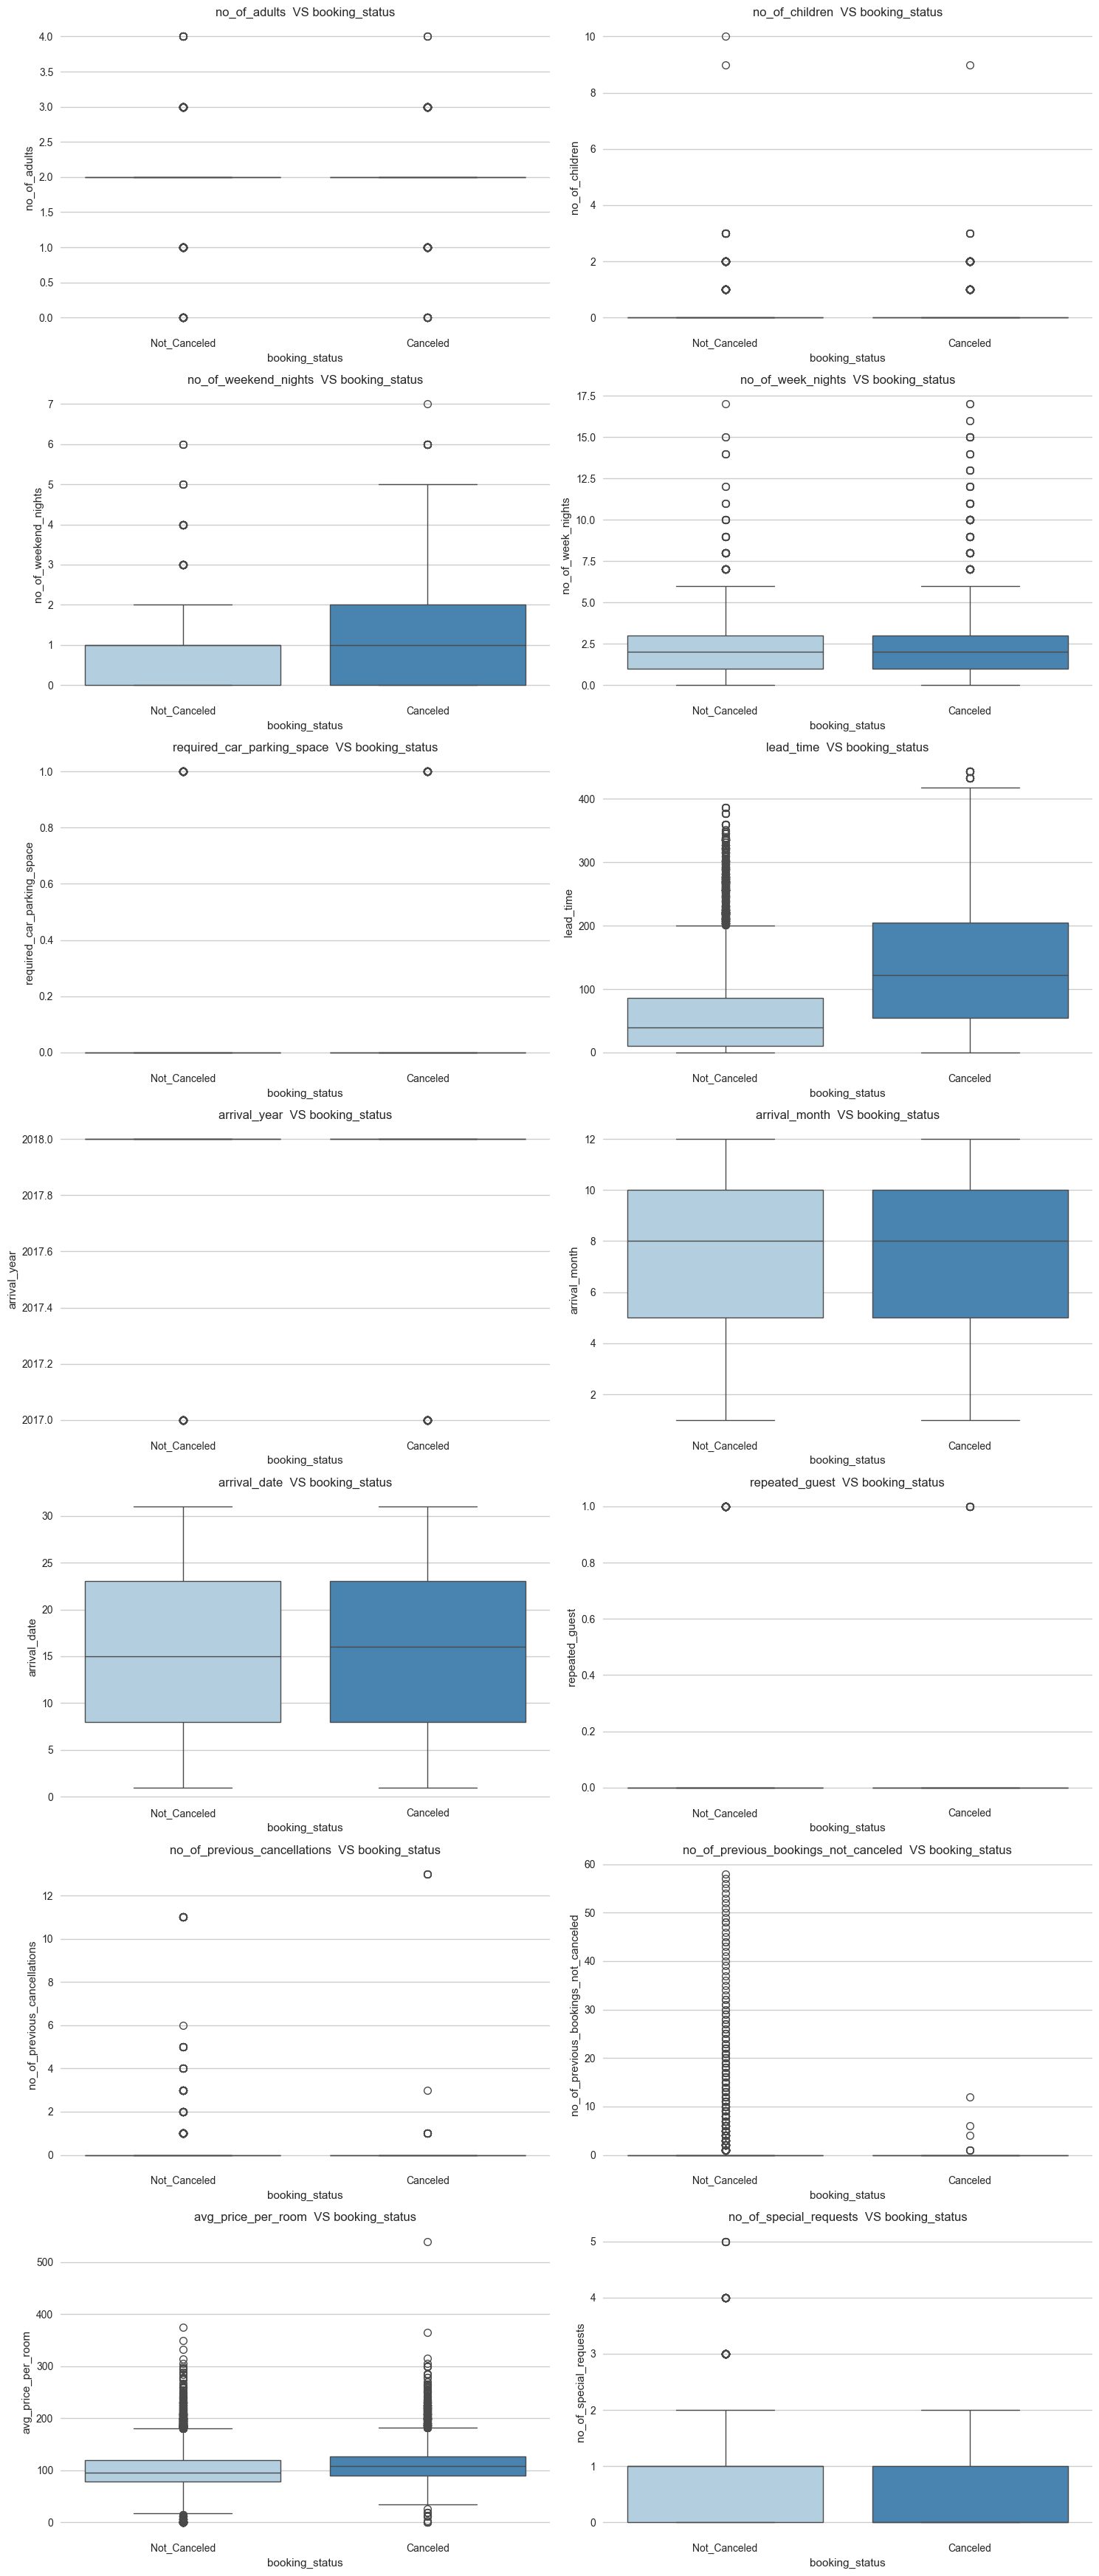

In [17]:
plot_bivariate_numericals(df_copy, 'booking_status', num_columns)

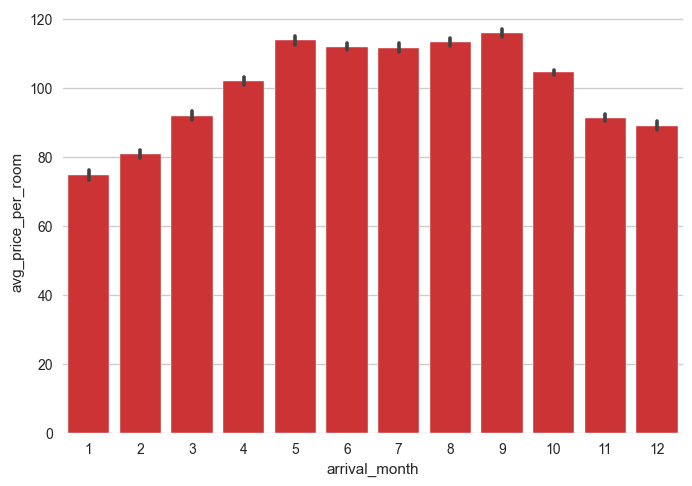

In [19]:
sns.barplot(x = 'arrival_month', y = "avg_price_per_room", data = df_copy)
plt.show()

In [22]:
def plot_bivaraite_cat(data, target, categorical_features):

    num_features = len(categorical_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(categorical_features):
        sns.countplot(x = feature , hue = target ,data = data, ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis = 'x' , rotation = 90)

    plt.tight_layout()
    plt.show()

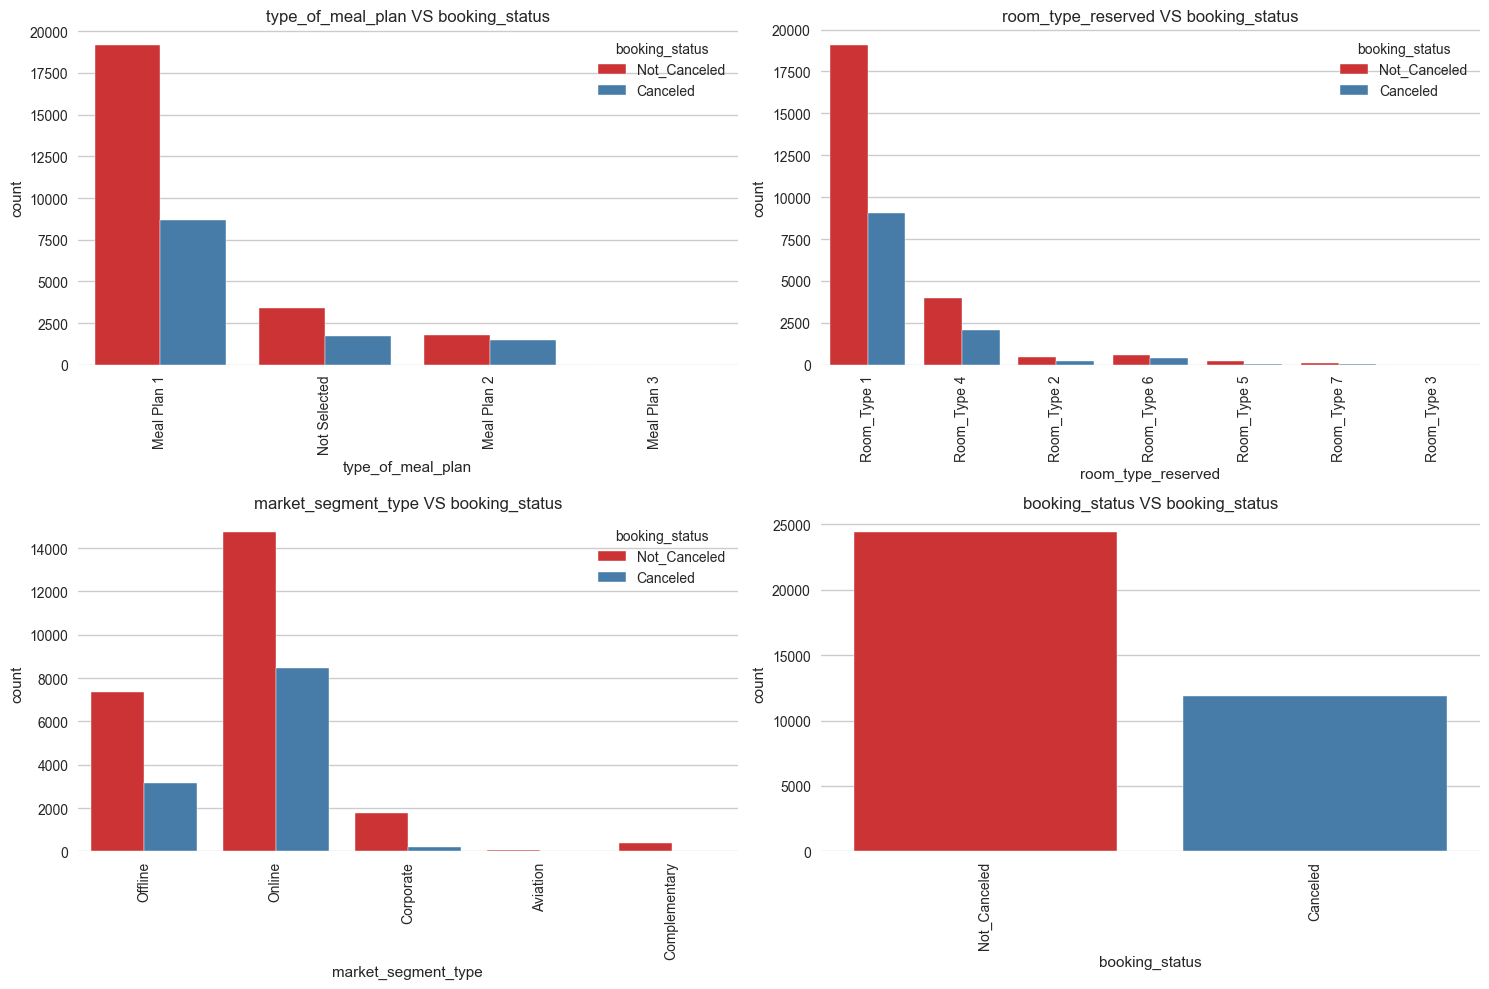

In [23]:
plot_bivaraite_cat(df_copy, 'booking_status', cat_columns)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [25]:
mappings = {}

for col in cat_columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [26]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [29]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [31]:
vif_data

,Feature,VIF
0,const,"35,939,190.2671"
1,no_of_adults,1.2935
2,no_of_children,1.2573
3,no_of_weekend_nights,1.0648
4,no_of_week_nights,1.0895
5,type_of_meal_plan,1.1558
6,required_car_parking_space,1.0332
7,room_type_reserved,1.5323
8,lead_time,1.4430
9,arrival_year,1.3004


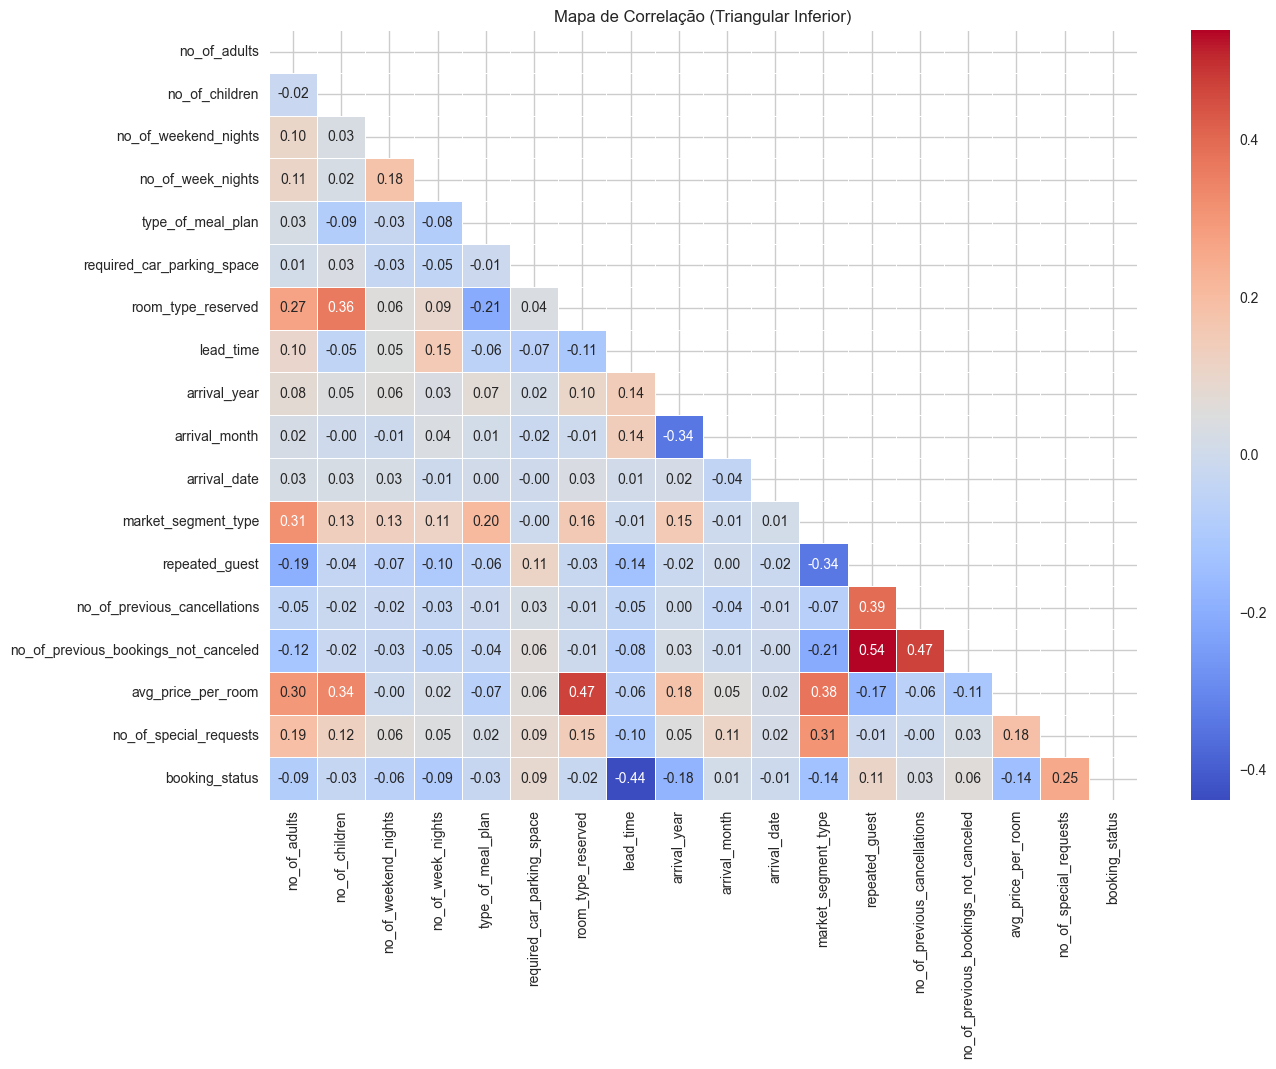

In [32]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação (Triangular Inferior)")

plt.show()

In [33]:
skewness  = df.skew()
skewness

no_of_adults                           -0.3333
no_of_children                          4.7103
no_of_weekend_nights                    0.7376
no_of_week_nights                       1.5994
type_of_meal_plan                       1.8014
required_car_parking_space              5.4136
room_type_reserved                      1.7290
lead_time                               1.2925
arrival_year                           -1.6697
arrival_month                          -0.3482
arrival_date                            0.0288
market_segment_type                    -1.6849
repeated_guest                          6.0029
no_of_previous_cancellations           25.1999
no_of_previous_bookings_not_canceled   19.2502
avg_price_per_room                      0.6671
no_of_special_requests                  1.1451
booking_status                         -0.7345
dtype: float64

In [34]:
for col in df.columns:
    if(skewness[col] > 5):
        df[col] = np.log1p(df[col])

In [35]:
skewness = df.skew()
skewness

no_of_adults                           -0.3333
no_of_children                          4.7103
no_of_weekend_nights                    0.7376
no_of_week_nights                       1.5994
type_of_meal_plan                       1.8014
required_car_parking_space              5.4136
room_type_reserved                      1.7290
lead_time                               1.2925
arrival_year                           -1.6697
arrival_month                          -0.3482
arrival_date                            0.0288
market_segment_type                    -1.6849
repeated_guest                          6.0029
no_of_previous_cancellations           14.5681
no_of_previous_bookings_not_canceled    8.9216
avg_price_per_room                      0.6671
no_of_special_requests                  1.1451
booking_status                         -0.7345
dtype: float64

# DATA RESAMPLING

In [36]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [37]:
X = df.drop(columns = ['booking_status'])
Y = df['booking_status']

In [38]:
Y.value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [41]:
Y_resampled.value_counts()

booking_status
1    24390
0    24390
Name: count, dtype: int64

In [42]:
# Our input data is still not resampled

df.shape

(36275, 18)

In [43]:
# Creating new data with resampled data

balanced_data = pd.DataFrame(X_resampled, columns = X.columns)
balanced_data['booking_status'] = Y_resampled

data = balanced_data.copy()
data.shape

(48780, 18)

In [44]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns = ['booking_status'])
Y = data['booking_status']

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X, Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
important_features = rf_model.feature_importances_
print(important_features)

[0.0217589  0.00551998 0.0323021  0.04519836 0.01984609 0.00831173
 0.01585656 0.30660052 0.02357682 0.08652501 0.08289803 0.05767605
 0.00502683 0.00056497 0.00227692 0.1462176  0.13984355]


In [46]:
important_features_data = pd.DataFrame({
    'feature': X.columns,
    'importance': important_features
})
important_features_data

,feature,importance
0,no_of_adults,0.0218
1,no_of_children,0.0055
2,no_of_weekend_nights,0.0323
3,no_of_week_nights,0.0452
4,type_of_meal_plan,0.0198
5,required_car_parking_space,0.0083
6,room_type_reserved,0.0159
7,lead_time,0.3066
8,arrival_year,0.0236
9,arrival_month,0.0865


In [47]:
top_important_features_data = important_features_data.sort_values(by = "importance" , ascending = False)

top_10_features = top_important_features_data['feature'].head(10).values

top_10_data = data[top_10_features.tolist() + ['booking_status']]
top_10_data.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,224,65.0000,0,10,2,3,2,1,2017,2,1
1,5,106.6800,1,11,6,4,3,2,2018,2,1
2,1,60.0000,0,2,28,4,1,2,2018,1,0
3,211,100.0000,0,5,20,4,2,0,2018,2,0
4,48,94.5000,0,4,11,4,1,1,2018,2,0


In [48]:
data = top_10_data.copy()

In [50]:
# Feature splitting

X = data.drop(columns = 'booking_status')
Y = data["booking_status"]

In [51]:
# Train-Test Splitting

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [53]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [54]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [55]:
# Pipeline for Model Training

for model_name, model in classifiers.items():
    print(f"Training {model_name} with specified parameters")
    
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    print(f"Successfully trained {model_name}!")
    print(f"{model_name} Accuracy is: {accuracy:.2f}")
    print("-" * 60)

Training Random Forest with specified parameters
Successfully trained Random Forest!
Random Forest Accuracy is: 0.92
------------------------------------------------------------
Training LogisticRegression with specified parameters
Successfully trained LogisticRegression!
LogisticRegression Accuracy is: 0.79
------------------------------------------------------------
Training Gradient Boosting with specified parameters
Successfully trained Gradient Boosting!
Gradient Boosting Accuracy is: 0.84
------------------------------------------------------------
Training Suuport vector classifier with specified parameters
Successfully trained Suuport vector classifier!
Suuport vector classifier Accuracy is: 0.69
------------------------------------------------------------
Training Decsion Tree with specified parameters
Successfully trained Decsion Tree!
Decsion Tree Accuracy is: 0.89
------------------------------------------------------------
Training KNN with specified parameters
Successfull

In [56]:
metrics_data = pd.DataFrame(metrics)
metrics_data

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.9181,0.9102,0.9275,0.9188
1,LogisticRegression,0.7920,0.7911,0.7929,0.7920
2,Gradient Boosting,0.8357,0.8301,0.8436,0.8368
3,Suuport vector classifier,0.6869,0.6544,0.7904,0.7160
4,Decsion Tree,0.8852,0.8930,0.8750,0.8839
5,KNN,0.8304,0.8569,0.7927,0.8235
6,Naive Bayes,0.7557,0.7723,0.7245,0.7476
7,XGboost,0.8961,0.8858,0.9091,0.8973
8,Adaboost,0.7769,0.7631,0.8021,0.7821
9,LGBM,0.8842,0.8677,0.9062,0.8865


In [57]:
# Feature splitting
X = data.drop(columns = 'booking_status')
Y = data["booking_status"]

# Train-Test Splitting
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [58]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [59]:
rf = RandomForestClassifier(random_state = 42)

# We will utilize these hyperparameters
params_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True , False] 
}

In [60]:
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = params_dist,  # Hyperparameter distributions
    n_iter = 5,                         # Number of parameter settings that are sampled
    cv = 5,                             # 5-Fold Cross Validation   
    verbose = 2,                        # Verbose is used for more detailed output, means it will print the progress
    random_state = 42,                  # Random state for reproducibility
    scoring = 'accuracy'                # Scoring metric to evaluate the models
)

In [61]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  16.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.3s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001CEDE43C710>, 'min_samples_leaf': <scipy.stats....001CEDDEE9250>, 'min_samples_split': <scipy.stats....001CEDDEE9D50>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [62]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [63]:
# Selecting the model with best parameters

best_rf_model = random_search.best_estimator_

In [64]:
# Predicting the output 

Y_pred = best_rf_model.predict(X_test)

In [65]:
print(f"Accuracy Score of the Random Forest Model: {accuracy_score(Y_test, Y_pred):.2f}")
print(f"Recall of the Random Forest Model: {recall_score(Y_test, Y_pred):.2f}")
print(f"Precision of the Random Forest Model: {precision_score(Y_test, Y_pred):.2f}")
print(f"F1 Score of the Random Forest Model: {f1_score(Y_test, Y_pred):.2f}")

Accuracy Score of the Random Forest Model: 0.91
Recall of the Random Forest Model: 0.93
Precision of the Random Forest Model: 0.90
F1 Score of the Random Forest Model: 0.92


In [66]:
import joblib

joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [67]:
loaded_model = joblib.load("random_forest.pkl")

In [68]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
19174,113,100.0000,0,5,31,2,3,0,2018,1


In [72]:
new_data = np.array([190, 100.0000, 0, 5, 31, 2, 3, 0, 2018, 1]).reshape(1, -1)

In [74]:
prediction = loaded_model.predict(new_data)
prediction

array([0])